### Veriseti 1981 ile 2005 yılları arasında, küçük bir şirketin yılın her çeyreğinde yaptığı satışları ve reklam bütçelerini içermektedir. 

- Sales : float, yapılan üç aylık satış
- AdBudget  : float, üç aylık reklam bütçesi

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from statsmodels.graphics.tsaplots import quarter_plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tute.csv")
df.head()

,Quarter,Sales,AdBudget
0,1981-03-01,1020.2,659.2
1,1981-06-01,889.2,589.0
2,1981-09-01,795.0,512.5
3,1981-12-01,1003.9,614.1
4,1982-03-01,1057.7,647.2


In [3]:
df["Quarter"] = pd.to_datetime(df["Quarter"])
df["year"] = df["Quarter"].dt.year # Quarter alanının içerisindeki yıl bilgisini kullanarak year alanı oluşturma
df["quarter"] = df["Quarter"].dt.quarter # Quarter alanının içerisindeki çeyreklik bilgisini kullanarak quarter alanı oluşturma
df.head()

,Quarter,Sales,AdBudget,year,quarter
0,1981-03-01,1020.2,659.2,1981,1
1,1981-06-01,889.2,589.0,1981,2
2,1981-09-01,795.0,512.5,1981,3
3,1981-12-01,1003.9,614.1,1981,4
4,1982-03-01,1057.7,647.2,1982,1


## Time Plot

#### _Zaman serisi verileri için, başlamak için en iyi grafik bir zaman grafiğidir. Yani, ardışık gözlemler düz çizgilerle,  zaman eksenine karşı birleştirilir. Gözlem değerleri y eksenine karşı çizilir._

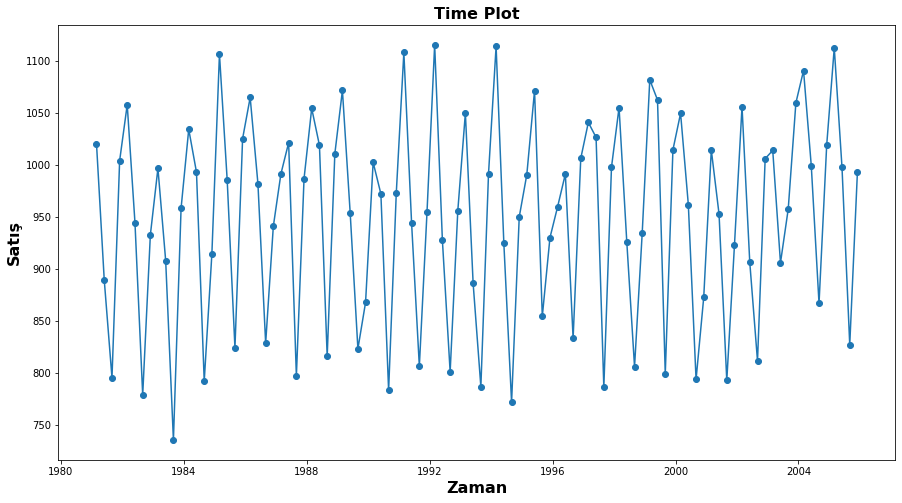

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(df["Quarter"],df["Sales"],marker='o')
plt.xlabel("Zaman", fontsize=16, fontdict=dict(weight='bold'))
plt.ylabel("Satış", fontsize=16, fontdict=dict(weight='bold'))
plt.title("Time Plot", fontsize=16, fontdict=dict(weight='bold'))
plt.show()

- Yukarıdaki zaman serisi grafiğine bakarak; zaman serisinin herhangi bir trend içermediğini rahatlıkla söyleyebiliriz. Bir zaman serisindeki trendin varlığını daha açık bir şekilde görmek istersek "Trend Box Plot" dediğimiz çizim yöntemini kullanabiliriz.

- Yukarıdaki zaman serisi grafiğine bakarak; çeyrekler bazındaki toplam satışların mevsimsellik içerdiğini söyleyebiliriz. Mevsimselliği daha açık bir şekilde görebilmek için farklı çizim yöntemleri bulunmaktadır.


## Trend Box Plot

#### _Zaman serisi verileri için, değerlerin zaman içindeki değişimini daha rahat bir şekilde görebilmek için trend kutu grafiği çizdirebiliriz. Bu çizimde aynı zaman birimi(bu örnekte yıl) içerisindeki gözlemler kutu grafiği olarak zaman eksenine karşı ardışık bir şekilde çizilir._

#### Trend Box Plot ile:
- Trendi daha açık bir şekilde gözlemleyebilir,
- Belirlenen zaman birimlerini birbirleriyle karşılaştırabilir,
- Belirlenen zaman birimleri içerisindeki gözlemlerin değişkenliğini gözlemleyebiliriz.


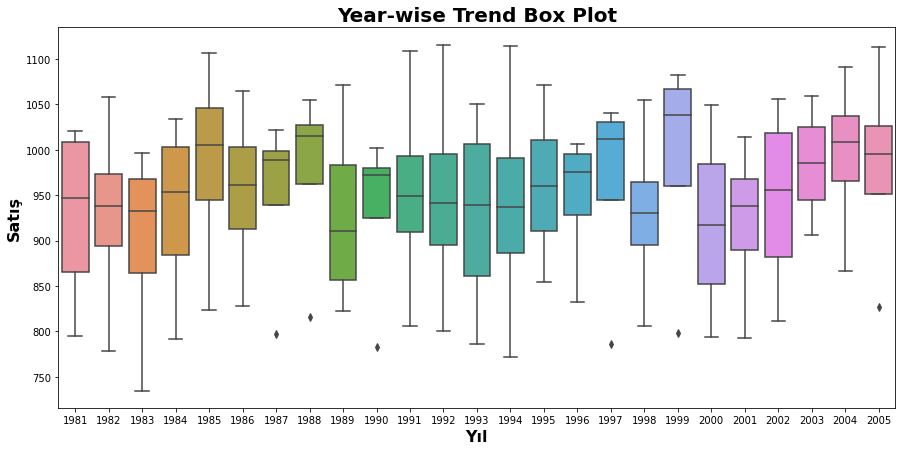

In [5]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(x="year",y= "Sales", ax=ax, data=df)
ax.set_title('Year-wise Trend Box Plot', fontsize = 20, fontdict=dict(weight='bold'))
ax.set_xlabel('Yıl', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Satış', fontsize = 16, fontdict=dict(weight='bold'))

plt.show()

- Yukarıdaki grafiğe bakarak satışlar bazında zamana bağlı olarak herhangi bir trendin olmadığını daha açık bir şekilde görebiliriz.

## Seasonal Plots

#### _Zaman serisi verileri için, değerlerin mevsimsellik içerip içermeğini daha rahat bir şekilde görebilmek için mevsimsel grafik çizdirebiliriz. Bu çizimde veriler gözlemlendiği mevsimlere karşı çizilir. Aynı sezondaki veriler üst üste çakışır böylelikle veriler içerisindeki mevsimsel kalıbı ve mevsimsel kalıbın değiştiği zaman aralıklarını daha net görebiliriz._

#### Seasonal Plot ile:
- Varsa mevsimsel kalıpları daha rahat görebiliriz.
- Mevsimsel kalıpların hangi zaman aralıklarında değiştiğini görebiliriz.
- Ani sıçrama ve düşüşleri görebiliriz.



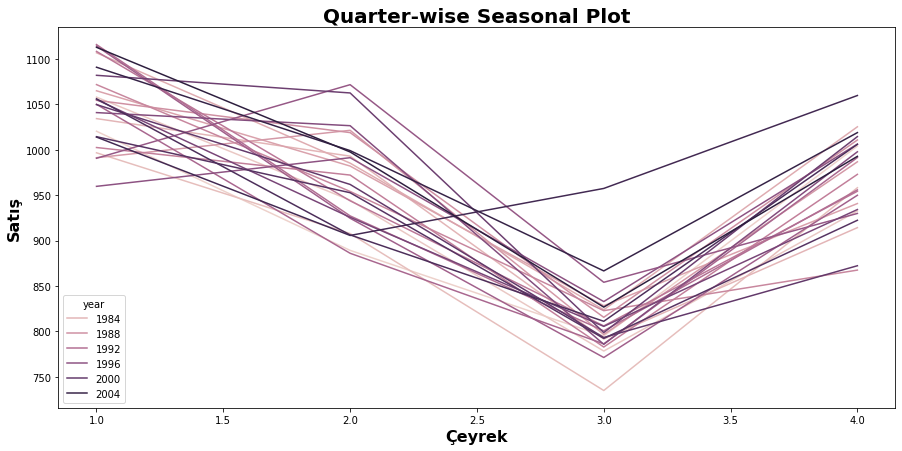

In [6]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(x="quarter",y="Sales",hue="year",data=df)
ax.set_title('Quarter-wise Seasonal Plot', fontsize = 20, fontdict=dict(weight='bold'))
ax.set_xlabel('Çeyrek', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Satış', fontsize = 16, fontdict=dict(weight='bold'))
plt.show()

- Satışlar 4.çeyrekte ani bir sıçrama yaşıyor ve en çok satış genelde 1.çeyrekte gerçekleşiyor. 

- Satışlar 2. ve 3. çeyreklerde düşerken en az satış 3.çeyrekte gerçekleşiyor.

## Seasonal Subseries Plot

#### _Mevsimsel kalıpları vurgulayan alternatif bir çizim olan "Seasonal subseries plots",verilerin her sezon için ayrı ayrı mini zaman grafiklerinde bir araya toplanmasıyla oluşur._

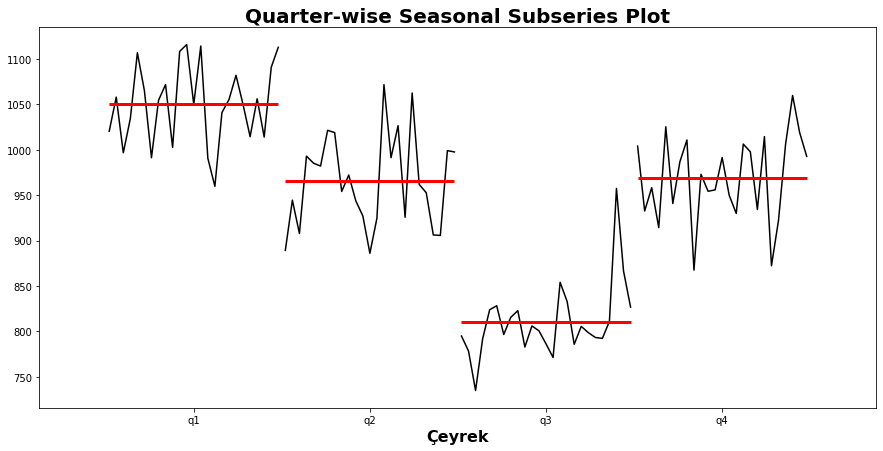

In [7]:
y = df[['Quarter','Sales']].copy()
y = y.set_index('Quarter')
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_title('Quarter-wise Seasonal Subseries Plot', fontsize = 20, fontdict=dict(weight='bold'))
ax.set_xlabel('Çeyrek', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Satış', fontsize = 16, fontdict=dict(weight='bold'))
quarter_plot(y, ax=ax);

- Kırmızı yatay çizgiler o çeyrek için ortalama satış miktarını gösterir.

## Lag plots

#### _Lag plot, zaman serisindeki verilerin, gecikmeli değerler ile karşılaştırmamızı olanak sağlar. Burada dikey eksen normal verileri, yatay eksen ise n. gecikmeli değerleri temsil eder._

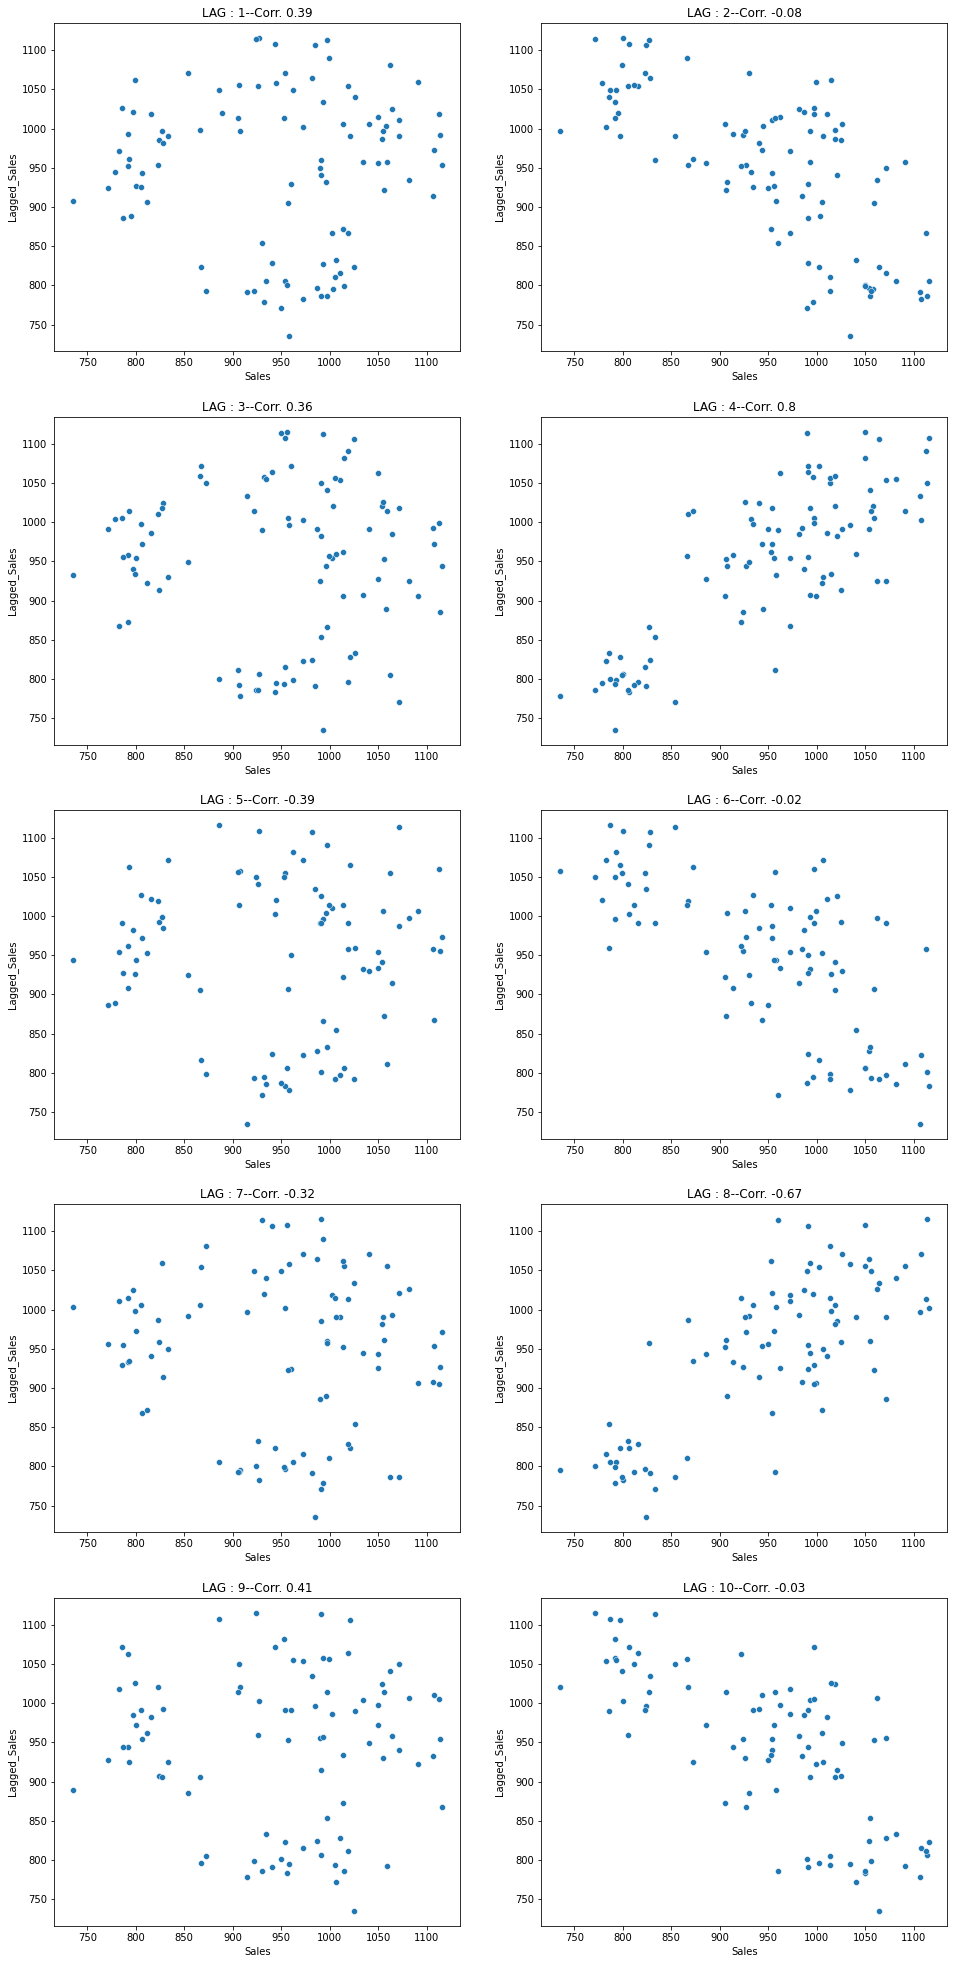

In [8]:
fig, ax = plt.subplots(5, 2, figsize=(16, 35))
for i in range(10):
    lagged = pd.concat([y["Sales"], y["Sales"].shift(i+1)], axis=1).dropna()
    lagged.columns = ["Sales","Lagged_Sales"]
    sns.scatterplot(x="Sales",y="Lagged_Sales",data=lagged,ax=ax[int(i/2),i%2])
    lagged = lagged.values.reshape(2,-1)
    ax[int(i/2),i%2].set_title(f"LAG : {i+1}--Corr. {round(pearsonr(lagged[0],lagged[1])[0],2)}")

plt.show()

- İlişki, verilerdeki güçlü mevsimselliği yansıtan gecikme 4 ve 8'de güçlü bir şekilde pozitiftir. 

## Autocorrelation

#### _Autocorrelation tamda yukarıda yaptığımız gibi; zaman serilerinde, gerçek seri ile gecikmeli seri arasındaki doğrusal ilişkiyi temsil eder._

## Autocorrelation Plot

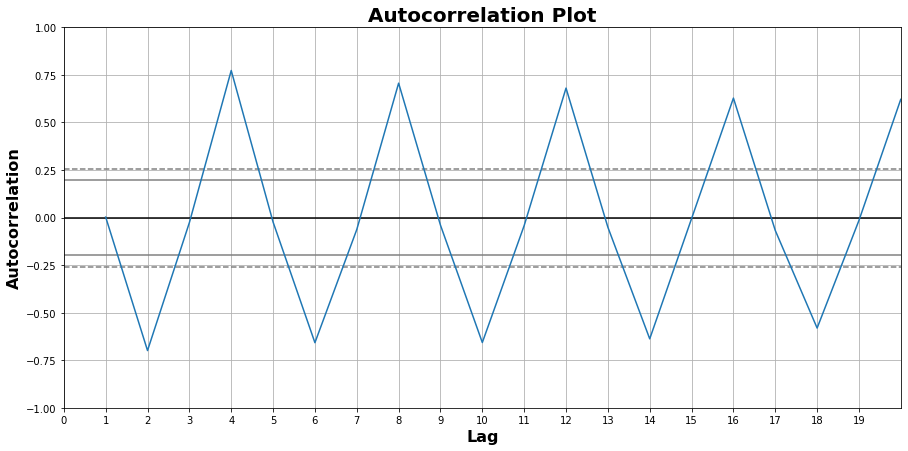

In [9]:
fig, ax = plt.subplots(figsize=(15, 7))
pd.plotting.autocorrelation_plot(y).set_xlim([0, 20])
plt.title('Autocorrelation Plot', fontsize = 20, fontdict=dict(weight='bold'))
ax.set_xlabel('Lag', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Autocorrelation', fontsize = 16, fontdict=dict(weight='bold'))
plt.xticks(list(range(20)))
plt.show()

- Bu grafikte: 4.gecikme ile gerçek seri arasındaki korelasyon diğer gecikmelere göre daha yüksektir. Bu, verilerdeki mevsimsel modelden kaynaklanmaktadır. Zirveler ve çukurlar dört çeyrek aralıklı olma eğilimindedir.

- Düz gri çizgiler, korelasyonların sıfırdan önemli ölçüde farklı olup olmadığını gösterir. 

## White Noise

#### _Otokorelasyon değerleri büyük çoğunlukla çok küçük olan zaman serilerine beyaz gürültü(white noise) serisi denir. Bir beyaz gürültü serisinde otokorelasyon değerlerinin %95 kadarı:_ <h1> $\pm\frac{2}{\sqrt(T)}$<h1>
#### _arasında kalır. T zaman serisinde veri adedini temsil eder. Bu sınırları yukarıdaki grafikten düz gri çizgiler olarak görebilirsiniz. Bir veya daha fazla büyük otokorelasyon değeri bu sınırların dışındaysa veya ani artışların önemli ölçüde %5'inden fazlası bu sınırların dışındaysa, bu durumda seri muhtemelen beyaz gürültü değildir._

In [10]:
ac_upper_bound = 2/(df.shape[0]**0.5)
ac_lower_bound = -2/(df.shape[0]**0.5)
print(f"Alt sınır : {ac_lower_bound}, Üst sınır : {ac_upper_bound}")

Alt sınır : -0.2, Üst sınır : 0.2


## Değişkenler arasındaki ilişkiler

#### _Bir seriyi diğerine karşı çizerek aralarındaki ilişkiyi inceleyebiliriz._

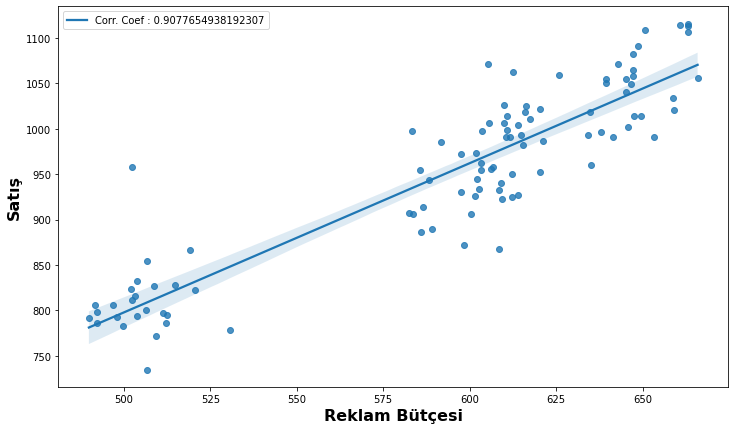

In [11]:
plt.figure(figsize=(12, 7))
ax = sns.regplot(x="AdBudget",y="Sales" ,data=df,
                                 line_kws={'label':f"Corr. Coef : {np.corrcoef(df['AdBudget'],df['Sales'])[0,1]}"})
ax.set_xlabel('Reklam Bütçesi', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Satış', fontsize = 16, fontdict=dict(weight='bold'))
ax.legend()
plt.show()

#### _Bu regresyon grafiği, değişkenler arasındaki ilişkiyi görselleştirmemize yardımcı olur. Reklam için ayrılan bütçe yüksek olduğunda yüksek satışların gerçekleştiği açıktır. Fakat tam tersinin de gerçekleşebileceğini unutmayın._